__원활한 채점을 위하여 notebook을 html로 저장하여 제출하시오__

__파일명은 HW2_학번_이름   으로 저장할 것__

먼저 다음 데이터를 로딩하시오

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('hw2data.txt',
                   header=None, names = ('feature1','feature2','y_label'))
data

,feature1,feature2,y_label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


### 1번 feature1, feature2 를 X 로, y_label을 y 로 하여  scatter plot 을 이용하여 y값에 따라 색깔을 달리 하여 그래프로 그리시오.

In [3]:
a1 = data[data["y_label"] == 1]
a2 = data[data["y_label"] == 0]

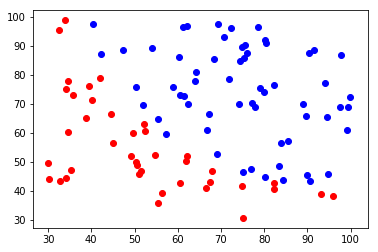

In [4]:
plt.scatter(a2["feature1"], a2["feature2"],  color='red')
plt.scatter(a1["feature1"], a1["feature2"],  color='blue')

### 2번 Gradient Descent를 이용하여, 직접 $\theta$ 값'들'을 구해보자.

하나의 샘플에서 cost는 다음과 같았다. 
$$
{  \text{cost} =
  \begin{cases}
    -\log(h_\theta(x))      & \quad \text{if }y=1\\
     -\log(1-h_\theta(x))   & \quad \text{if }y=0
  \end{cases}
}
$$
100 개의 샘플을 위 cost의 모든 샘플의 평균이라고 하자 (cost의 합 나누기 샘플 수)

numpy array를 적극 활용하여 sum을 마지막에 구하는게 이상적이나, 직접 100개의 합을 구해도 된다. 

linear regression의 GD와 오늘 배운 미분식을 이용하여, learning rate 0.1로 하고, step size를 10000으로 하여, $\theta$들을 구해보자.

(초기 값이 다 다르므로, 모든 학생들의 $\theta$는 상이할 것이라고 예상한다. )

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
def compute_cost(beta_0 ,beta_1 ,beta_2, points):
    total_cost = 0.
    N = float(len(points))      # 왜 float로 casting 했는지 ?  정수로 할경우 분모가 정수일 경우 정수로 계산이 되기에 오류가 생긴다. 그래서 실수로 변환을 한다.
    
    for i in range(len(points)):
        x1 = points[i,0]
        x2 = points[i,1]
        y = points[i,2]
        total_cost += (y - sigmoid(beta_0 + beta_1*x1 + beta_2*x2) )**2
        
    return total_cost/N    # 때에 따라 N은 없어도 됨.


def gradient_descent_runner(points, starting_beta_0, starting_beta_1, starting_beta_2, learning_rate, num_iterations):
    
    beta_2 = starting_beta_2
    beta_1 = starting_beta_1
    beta_0 = starting_beta_0
    
    cost_graph = []
    
    for i in range(num_iterations):
        cost_graph.append(compute_cost(beta_0,beta_1, beta_2,points))
        beta_0, beta_1, beta_2 = step_gradient(beta_0,beta_1, beta_2, points, learning_rate)
        
    return [ beta_0, beta_1, beta_2, cost_graph]


def step_gradient(beta_0_current, beta_1_current,beta_2_current, points, learning_rate):
    
    beta_0_gradient = 0 
    beta_1_gradient = 0
    beta_2_gradient = 0
    
    N = float(len(points))
    
    for i in range(len(points)):
        x1 = points[i,0]
        x2 = points[i,1]
        y = points[i,2]
        beta_0_gradient += -(1/N)*(y-sigmoid(beta_1_current*x1 + beta_2_current * x2 + beta_0_current))
        beta_1_gradient += -(1/N)*x1*(y-sigmoid(beta_1_current*x1 + beta_2_current * x2 + beta_0_current))
        beta_2_gradient += -(1/N)*x2*(y-sigmoid(beta_1_current*x1 + beta_2_current * x2 + beta_0_current))
        
    beta_0_updated = beta_0_current - learning_rate * beta_0_gradient 
    beta_1_updated = beta_1_current - learning_rate * beta_1_gradient 
    beta_2_updated = beta_2_current - learning_rate * beta_2_gradient 
            
    return [beta_0_updated, beta_1_updated, beta_2_updated]
        

In [7]:
learning_rate = 0.001     # hyper parameter: alpha
num_iterations = 50000    # hyper parameter: number of steps 
initial_beta_0 = 0
initial_beta_1 = 0.5
initial_beta_2 = 0.5

In [8]:
points = np.array(data)
beta_0,beta_1,beta_2,cost_graph = gradient_descent_runner(points, initial_beta_0, initial_beta_1,initial_beta_2, learning_rate, num_iterations)

In [9]:
print(beta_0,beta_1,beta_2)

-2.8545829374526934 0.030739098091852046 0.02279974752410811


### 3. 위에서 구한 $\theta$들을 이용하여 decision boundary를 그려보자. 
왜 그렇게 그리게 되었는지 서술하시오. 


시그모이드에서 0.5 이상 이하 확인후 나누고
그걸 기준으로 그래프 그리기

In [14]:
pred = -(beta_0 + data.iloc[:,0] * beta_1 - 0.5) / beta_2
# 시그모이드에서 0.5일 때 feature2의 값들을 pred

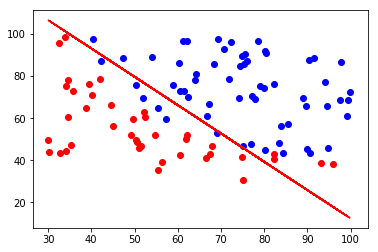

In [15]:
plt.scatter(a2["feature1"], a2["feature2"],  color='red')
plt.scatter(a1["feature1"], a1["feature2"],  color='blue')
plt.plot(data.iloc[:,0],pred, c='r')